# Questions

* Requête SQL : ma méthode est elle bonne ?
ok
ou alors les plus vues
ou score >0
au moins une réponse
* Comment obtenir plus d'éléments ?
pas nécessaire (>10000 ok)
* Plusieurs requêtes ? Plusieurs tables ?
non
* Reqête auto dans le code ?
oui en général mais pas forcément sur ce projet

* Git + Github + Jupyter ok pour le projet ? Où l'expliquer, dans le pdf ?

* "Le code final à déployer présenté dans un répertoire et développé progressivement à l’aide d’un logiciel de gestion de version (plusieurs commits cohérents)." ?

* "Le point d’entrée d’une API disponible pour le test." ?
code sous forme d'un blackbox
(flask, fast api, etc.)
* Process global du pj
voir ci dessous


installer VS code
monter en comp sur plotly
def de données non structurée (données type images, textes, audio, etc.)

env virtuel pour chaque pj
**faire un requirements.txt**

Les env doivent etre dans un meme dossier


### Objectifs

* Mettre en œuvre des techniques d’extraction de features pour des données non structurées
* Représenter graphiquement des données à grandes dimensions
* Prétraiter des données non structurées pour obtenir un jeu de données exploitable
* Mettre en œuvre des techniques de réduction de dimension

### Eval
1.
prétraitement des données non structurées
texte nettoyé avec regex + lib spécialisée ex : beautifulsoup
(traitement html dans des données)
    non pertinence de stemming car il est attendu de proposer des mots clés va des topics
    quels types de mots
    approche non supervisé via LDA
    approche supervisé en exploitant des tags existants
    eventuellement en combinant les 2
    
    analyse critique ex tags existants ne sont pas forcément pertinents
les champs de texte sont nettoyés (minuscule etc)
fonction permettant de tokeniser
fonction permettant de stemmer
idem lemmatiser

illustration des bonne réalisation des étapes précédentes

execution de LDA sklearn tps important (regarder coté fast LDA)

2.
mise en oeuvre des techniques de réduction de données
réduction de dimention (ex ACP pour données texte)
Choix des valeurs de paramètres est justifié

3.
Mettre en oeuvre des techniques de fraction de features
ex bag of word
retirer les stopwords
seuil de fréquence de mots
TDIDF
vectorisé

4.
représenter des données en grande dimention
au moins un graphique en plus de 2D

expliquer la signification es diff lt graph à un public non expert


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML

from IPython.core.interactiveshell import InteractiveShell

# # Activate multi output
# InteractiveShell.ast_node_interactivity = "all"

# # set size of window
# display(HTML(data="""
# <style>
#     div#notebook-container    { width: 95%; }
#     div#menubar-container     { width: 65%; }
#     div#maintoolbar-container { width: 99%; }
# </style>
# """))

pd.set_option('display.max_column', 100)

<img src="14858512893477_so-logo.png" width="600px">    

<a id="top"></a>
<h1 style="font-family:verdana;font-size:300%;text-align:left;">Sommaire</h1>

---

* [1. Sujet](#1)
    * [1.1 Contexte](#1.1)
    * [1.2 Extraction SQL](#1.2) 
* [2. Import](#2)
* [3. Cleaning -Exploration](#3)
    * [3.1 df_order_reviews](#3.1)
    * [3.2 df_order_payments](#3.2)
    * [3.3 df_orders](#3.3)
    * [3.4 df_customers](#3.4)
    * [3.5 df_geolocation](#3.5)
    * [3.6 df_order_items - df_products - df_translation](#3.6)
    * [3.7 df_clean](#3.7)
* [4. Features](#4)
    * [4.1 Récence](#4.1)
    * [4.2 Fréquence](#4.2)
    * [4.3 Montant](#4.3)
    * [4.4 Recapitulatif](#4.4)
* [5. Imputation](#5)
* [6. Encodage](#6)
* [7. Export](#7)


<a id="1"></a>
<h2 style="font-family:verdana;font-size:250%;text-align:left;">1. Sujet</h2>

---

<a id="1.1"></a>
<h3 style="font-family:verdana;font-size:200%;text-align:left;">1.1 Contexte</h3>

Stack Overflow est un site célèbre de questions-réponses liées au développement informatique.  
Pour poser une question sur ce site, il faut entrer plusieurs tags de manière à retrouver facilement la question par la suite.  
Pour les utilisateurs expérimentés, cela ne pose pas de problème, mais pour les nouveaux utilisateurs, il serait judicieux de suggérer quelques tags relatifs à la question posée.

Amateur de Stack Overflow, qui vous a souvent sauvé la mise, vous décidez d'aider la communauté en retour.  
Pour cela, vous développez un **système de suggestion de tag** pour le site.  
Celui-ci prendra la forme d’un algorithme de machine learning qui assigne automatiquement plusieurs tags pertinents à une question.

<h4 style="font-family:verdana;font-size:125%;text-align:left;">Contraintes</h4>

1. Mettre en œuvre une approche non supervisée.  
2. Utiliser une approche supervisée ou non pour extraire des tags à partir des résultats précédents.  
3. Comparer ses résultats à une approche purement supervisée, après avoir appliqué des méthodes d’extraction de features spécifiques des données textuelles.  
4. Mettre en place une méthode d’évaluation propre, avec une séparation du jeu de données pour l’évaluation.  
5. Pour suivre les modifications du code final à déployer, utiliser un logiciel de gestion de versions, par exemple Git.

<a id="1.2"></a>
<h3 style="font-family:verdana;font-size:200%;text-align:left;">1.2 Extraction SQL</h3>

La première étape consiste à récupérer un corpus grâce à un outil d’export de données.
Celui ci prend en entrée des requêtes SQL et fourni des extractions CSV des BDD de StackOverFlow.

Voici la requête utilisée pour obtenir la BDD :


>SELECT CreationDate, Score, ViewCount, Body, Title, Tags, AnswerCount, CommentCount, FavoriteCount  
>FROM posts  
>WHERE (Tags IS NOT NULL AND Title IS NOT NULL AND Body IS NOT NULL AND FavoriteCount > 40)

<a id="2"></a>
<h2 style="font-family:verdana;font-size:250%;text-align:left;">2. Import</h2>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Sommaire</a>

In [25]:
file = "data/QueryResults.csv"
data_raw = pd.read_csv(file, index_col='CreationDate', parse_dates=True)

In [26]:
data_raw.head()
data_raw.shape

,Score,ViewCount,Body,Title,Tags,AnswerCount,CommentCount,FavoriteCount
CreationDate,,,,,,,,
2010-09-27 06:56:36,152,66955,<p>I lately had the problem of creating add an...,Good or bad practice for Dialogs in wpf with M...,<c#><.net><wpf><mvvm><modal-dialog>,3,12,115
2008-08-20 12:00:59,336,192213,<p>I am currently developing a .NET applicatio...,Warning: Found conflicts between different ver...,<.net><warnings>,19,1,63
2008-08-20 13:27:40,358,218256,<p>I'm thinking in particular of how to displa...,How to round up the result of integer division?,<c#><java><math>,16,5,90
2008-08-20 13:38:14,227,384079,<p>I have a process in Linux that's getting a ...,How to generate a core dump in Linux on a segm...,<linux><bash><unix><coredump><tcsh>,12,1,106
2008-08-20 14:21:13,2454,1513131,"<p>What's the cleanest, most effective way to ...",Validate decimal numbers in JavaScript - IsNum...,<javascript><validation><numbers>,49,9,746


(31329, 8)

<a id="3"></a>
    <h2 style="font-family:verdana;font-size:250%;text-align:left;">3. Cleaning - Exploration</h2>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Sommaire</a>

In [28]:
data = data_raw.copy()

In [51]:
data.describe(include='all')

,Score,ViewCount,Body,Title,Tags,AnswerCount,CommentCount,FavoriteCount
count,31329.000000,3.132900e+04,31329,31329,31329,31329.000000,31329.000000,31329.000000
unique,NaN,NaN,31329,31328,24864,NaN,NaN,NaN
top,NaN,NaN,<p>I'm trying to write to a log file with Go.<...,Autocompletion in Vim,<git>,NaN,NaN,NaN
freq,NaN,NaN,1,2,266,NaN,NaN,NaN
mean,318.296690,2.865272e+05,NaN,NaN,NaN,12.272719,2.940502,114.824763
std,520.668119,3.957367e+05,NaN,NaN,NaN,10.947006,3.690432,223.479265
min,-146.000000,2.785000e+03,NaN,NaN,NaN,0.000000,0.000000,41.000000
25%,119.000000,8.169700e+04,NaN,NaN,NaN,6.000000,0.000000,50.000000
50%,194.000000,1.689490e+05,NaN,NaN,NaN,10.000000,2.000000,67.000000
75%,336.000000,3.383100e+05,NaN,NaN,NaN,16.000000,4.000000,109.000000


In [39]:
data.resample('M').count()

,Score,ViewCount,Body,Title,Tags,AnswerCount,CommentCount,FavoriteCount
CreationDate,,,,,,,,
2008-07-31,3,3,3,3,3,3,3,3
2008-08-31,362,362,362,362,362,362,362,362
2008-09-30,1096,1096,1096,1096,1096,1096,1096,1096
2008-10-31,838,838,838,838,838,838,838,838
2008-11-30,514,514,514,514,514,514,514,514
...,...,...,...,...,...,...,...,...
2020-07-31,0,0,0,0,0,0,0,0
2020-08-31,2,2,2,2,2,2,2,2
2020-09-30,1,1,1,1,1,1,1,1


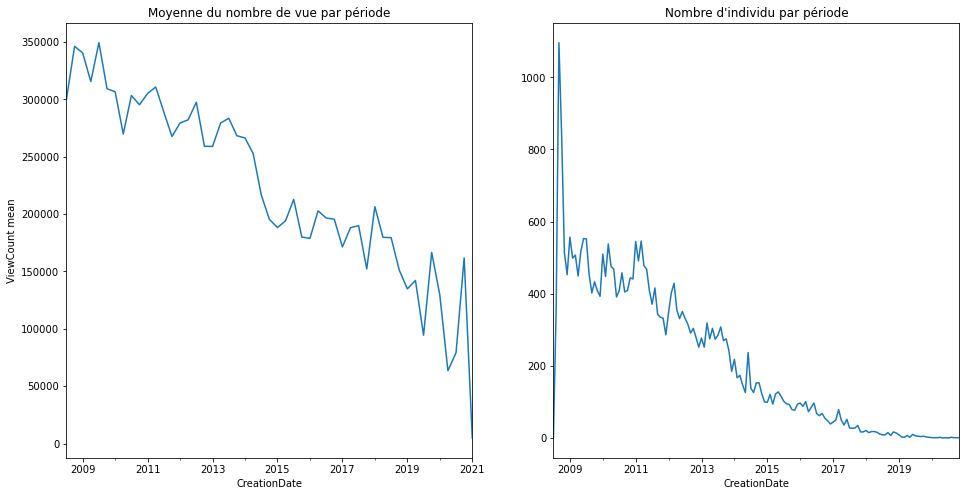

In [47]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
data['ViewCount'].resample('3M').mean().plot()
plt.ylabel('ViewCount mean')
plt.title('Moyenne du nombre de vue par période')

plt.subplot(122)
data['Score'].resample('M').count().plot()
plt.title("Nombre d'individu par période")

plt.show();

In [ ]:
plt.figure(figsize=(24, 8))

plt.subplot(131)

